In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-hour-and-half-hour-dataset/Hour_Final (1).csv
/kaggle/input/final-hour-and-half-hour-dataset/Final_Half_Hour (1).csv


In [178]:
#mathematical operations
import math
import scipy as sp
import numpy as np
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()

#machine learning and statistical methods
import statsmodels.api as sm

#dataframe index manipulations
import datetime

#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#muting unnecessary warnings if needed
import warnings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import copy
from pylab import rcParams

%matplotlib inline

In [3]:
# df1= half hour
#df2= hour

df1=pd.read_csv('/kaggle/input/final-hour-and-half-hour-dataset/Final_Half_Hour (1).csv')
df2=pd.read_csv('/kaggle/input/final-hour-and-half-hour-dataset/Hour_Final (1).csv')

In [4]:
df1

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,HalfHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type
0,0,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,20,2018-07-10 09:30:00,1,0,0
1,1,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,24,2018-07-03 11:30:00,1,0,0
2,2,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,32,2018-07-17 15:30:00,1,0,0
3,3,15,15,Vrindavan Society-Vrindavan Society,2018,7,4,23,2018-07-27 11:00:00,1,0,0
4,4,15,15,Vrindavan Society-Vrindavan Society,2018,8,0,28,2018-08-06 13:30:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1265140,1265140,21,20,Wagle Depot-Yashodhannagar,2019,11,0,29,2019-11-11 14:00:00,1,0,0
1265141,1265141,21,20,Wagle Depot-Yashodhannagar,2019,12,0,31,2019-12-16 15:00:00,1,0,0
1265142,1265142,21,20,Wagle Depot-Yashodhannagar,2022,11,3,30,2022-11-10 14:30:00,1,0,0
1265143,1265143,21,20,Wagle Depot-Yashodhannagar,2023,10,2,37,2023-10-04 18:00:00,1,0,0


In [5]:
df2

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,OneHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type
0,0,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,10,2018-07-10 09:00:00,1,0,0
1,1,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,12,2018-07-03 11:00:00,1,0,0
2,2,15,15,Vrindavan Society-Vrindavan Society,2018,7,1,16,2018-07-17 15:00:00,1,0,0
3,3,15,15,Vrindavan Society-Vrindavan Society,2018,7,4,12,2018-07-27 11:00:00,1,0,0
4,4,15,15,Vrindavan Society-Vrindavan Society,2018,8,0,14,2018-08-06 13:00:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
784665,784665,21,20,Wagle Depot-Yashodhannagar,2019,11,0,15,2019-11-11 14:00:00,1,0,0
784666,784666,21,20,Wagle Depot-Yashodhannagar,2019,12,0,16,2019-12-16 15:00:00,1,0,0
784667,784667,21,20,Wagle Depot-Yashodhannagar,2022,11,3,15,2022-11-10 14:00:00,1,0,0
784668,784668,21,20,Wagle Depot-Yashodhannagar,2023,10,2,19,2023-10-04 18:00:00,1,0,0


In [6]:
df1['Station_Pair'].unique()

array(['Vrindavan Society-Vrindavan Society',
       'Vrindavan Society-Civil/Court', 'Vrindavan Society-Wagle Depot',
       'Vrindavan Society-Thane Station(Satis)',
       'Vrindavan Society-Pradeep Society/Panch Pakhadi',
       'Vrindavan Society-Kamgar Gate', 'Civil/Court-Vrindavan Society',
       'Civil/Court-Thane Station(Satis)',
       'Civil/Court-Pradeep Society/Panch Pakhadi',
       'Civil/Court-Kamgar Gate', 'Civil/Court-Wagle Depot',
       'Thane Station(Satis)-Pradeep Society/Panch Pakhadi',
       'Thane Station(Satis)-Vrindavan Society',
       'Thane Station(Satis)-Civil/Court',
       'Thane Station(Satis)-Wagle Depot',
       'Thane Station(Satis)-Thane Station(Satis)',
       'Thane Station(Satis)-Vandana Cinema',
       'Thane Station(Satis)-Kamgar Gate',
       'Thane Station(Satis)-Yashodhannagar',
       'Pradeep Society/Panch Pakhadi-Vrindavan Society',
       'Pradeep Society/Panch Pakhadi-Civil/Court',
       'Pradeep Society/Panch Pakhadi-Thane Station(

In [7]:
# Convert the 'Date_Time' column to a pandas DatetimeIndex
halfhour = pd.read_csv('/kaggle/input/final-hour-and-half-hour-dataset/Final_Half_Hour (1).csv', index_col='Date_Time', parse_dates=['Date_Time'])
hour = pd.read_csv('/kaggle/input/final-hour-and-half-hour-dataset/Hour_Final (1).csv', index_col='Date_Time', parse_dates=['Date_Time'])

In [8]:
# Create a new DataFrame with the desired 'Station
# Create a new DataFrame with the desired 'Station_Pair' value and Year == 2022
halfhour2022 = df1[(df1['Station_Pair'] == 'Thane Station(Satis)-Wagle Depot') & (df1['Year'] == 2022)]
hour2022 = df2[(df2['Station_Pair'] == 'Thane Station(Satis)-Wagle Depot') & (df2['Year'] == 2022)]
halfhour2023 = df1[(df1['Station_Pair']=='Thane Station(Satis)-Wagle Depot')&(df1['Year']==2023)]
hour2023 = df2[(df2['Station_Pair']=='Thane Station(Satis)-Wagle Depot')&(df2['Year']==2023)]

In [9]:
halfhour2022.set_index('Date_Time', inplace=True, drop=False)
hour2022.set_index('Date_Time', inplace=True, drop=False)

halfhour2023.set_index('Date_Time', inplace=True, drop=False)
hour2023.set_index('Date_Time', inplace=True, drop=False)

In [10]:
halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
hour2022['Date_Time'] = pd.to_datetime(hour2022['Date_Time'])

halfhour2023['Date_Time'] = pd.to_datetime(halfhour2023['Date_Time'])
hour2023['Date_Time'] = pd.to_datetime(hour2023['Date_Time'])

/tmp/ipykernel_76/611180027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
/tmp/ipykernel_76/611180027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2022['Date_Time'] = pd.to_datetime(hour2022['Date_Time'])
/tmp/ipykernel_76/611180027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

### Plotting for Halfhour TimeSlots

### 2022

/tmp/ipykernel_76/4292934148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
/tmp/ipykernel_76/4292934148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
/tmp/ipykernel_76/4292934148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

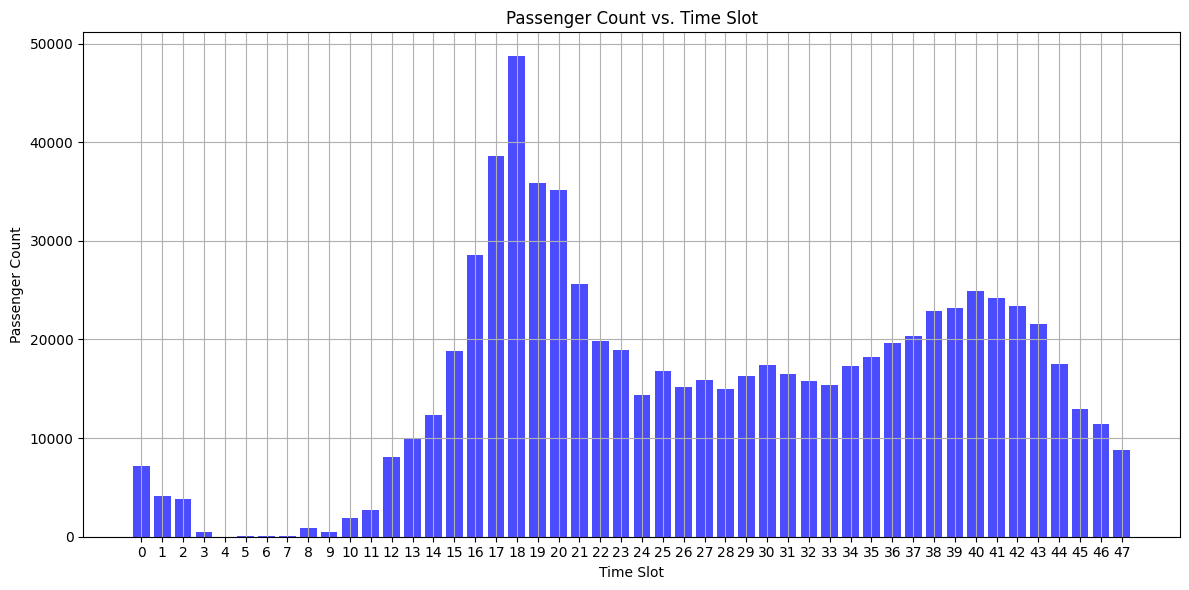

In [11]:
halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
halfhour2022['Minute'] = halfhour2022['Date_Time'].dt.minute
halfhour2022['Time_Slot'] = halfhour2022['Hour'] * 2 + halfhour2022['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot = halfhour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_time_slot['Time_Slot'], df_time_slot['Passenger_Count'], color='b', alpha=0.7)
# Adding labels and title
plt.xlabel('Time Slot')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot')
# Set x-ticks to display all values from 1 to 48
plt.xticks(range(0, 48))
# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 2023

/tmp/ipykernel_76/280001200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2023['Date_Time'] = pd.to_datetime(halfhour2023['Date_Time'])
/tmp/ipykernel_76/280001200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2023['Hour'] = halfhour2023['Date_Time'].dt.hour
/tmp/ipykernel_76/280001200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

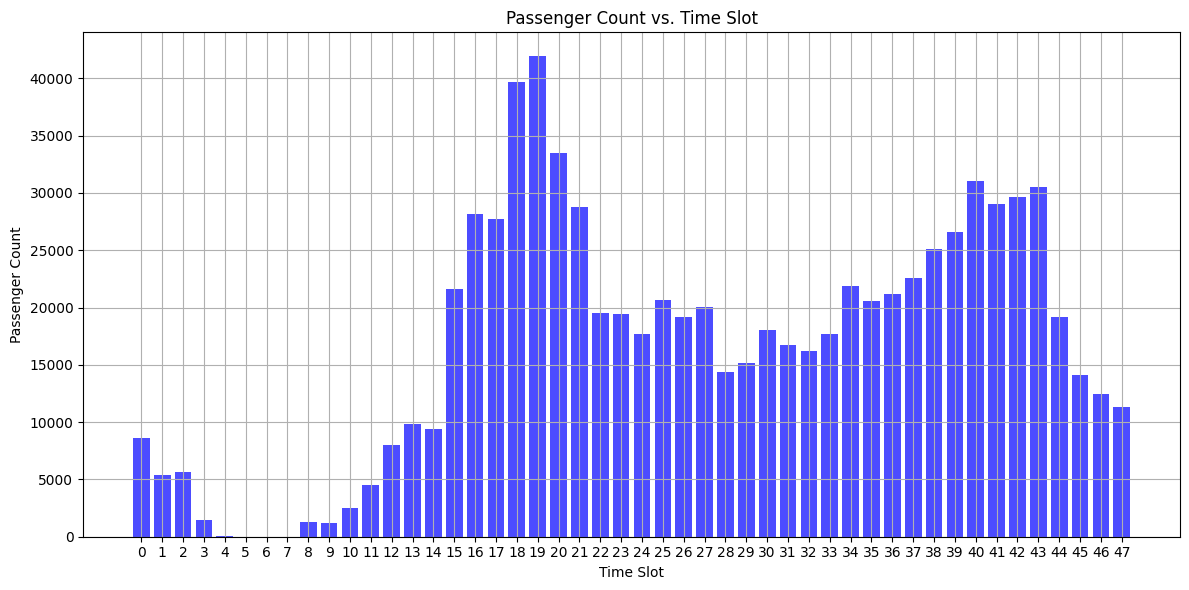

In [12]:
halfhour2023['Date_Time'] = pd.to_datetime(halfhour2023['Date_Time'])
halfhour2023['Hour'] = halfhour2023['Date_Time'].dt.hour
halfhour2023['Minute'] = halfhour2023['Date_Time'].dt.minute
halfhour2023['Time_Slot'] = halfhour2023['Hour'] * 2 + halfhour2023['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot = halfhour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(df_time_slot['Time_Slot'], df_time_slot['Passenger_Count'], color='b', alpha=0.7)
# Adding labels and title
plt.xlabel('Time Slot')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot')
# Set x-ticks to display all values from 1 to 48
plt.xticks(range(0, 48))
# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_76/813519926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
/tmp/ipykernel_76/813519926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
/tmp/ipykernel_76/813519926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

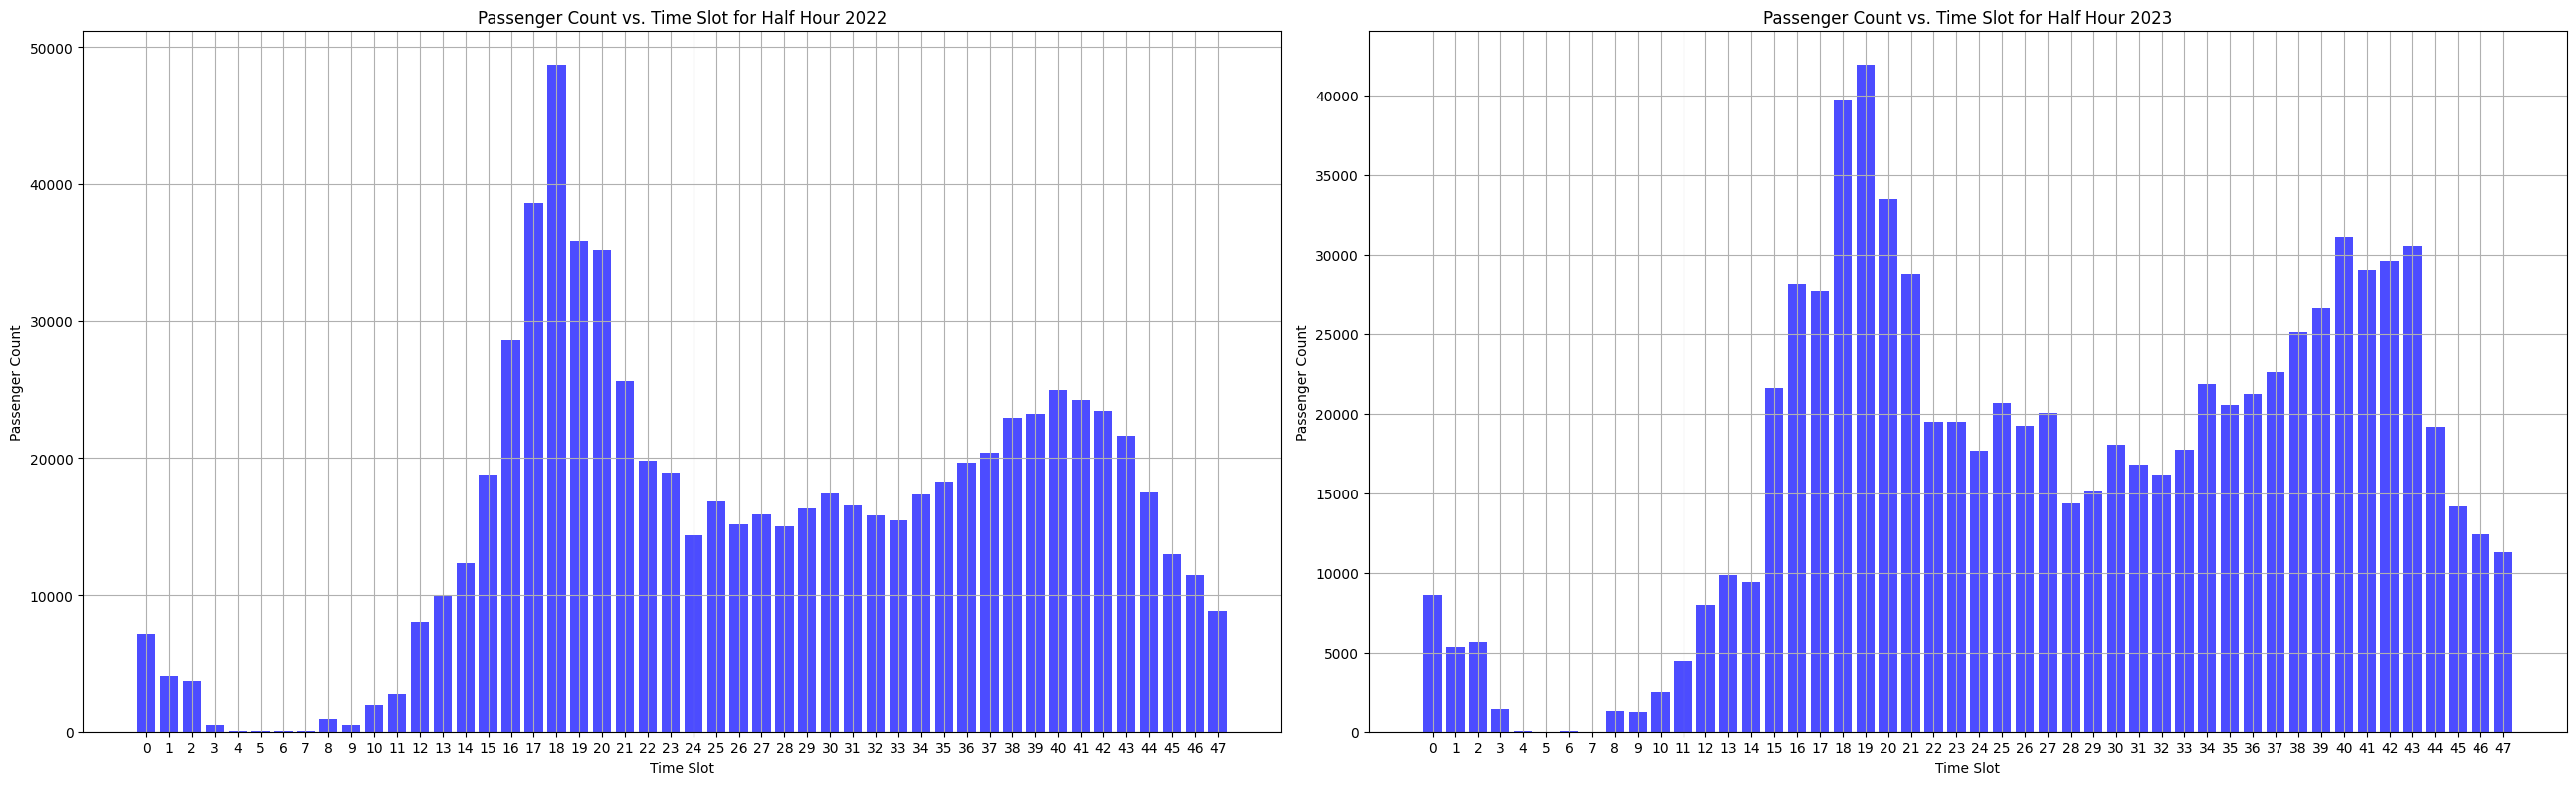

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# For Half Hour 2022
halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
halfhour2022['Minute'] = halfhour2022['Date_Time'].dt.minute
halfhour2022['Time_Slot'] = halfhour2022['Hour'] * 2 + halfhour2022['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_2022 = halfhour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting for Half Hour 2022
plt.figure(figsize=(26, 8))
plt.subplot(1, 2, 1)
plt.bar(df_time_slot_2022['Time_Slot'], df_time_slot_2022['Passenger_Count'], color='b', alpha=0.7)
plt.xlabel('Time Slot')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot for Half Hour 2022')
plt.xticks(range(0, 48))
plt.grid(True)
plt.tight_layout()

# For Half Hour 2023
halfhour2023['Date_Time'] = pd.to_datetime(halfhour2023['Date_Time'])
halfhour2023['Hour'] = halfhour2023['Date_Time'].dt.hour
halfhour2023['Minute'] = halfhour2023['Date_Time'].dt.minute
halfhour2023['Time_Slot'] = halfhour2023['Hour'] * 2 + halfhour2023['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_2023 = halfhour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting for Half Hour 2023
plt.subplot(1, 2, 2)
plt.bar(df_time_slot_2023['Time_Slot'], df_time_slot_2023['Passenger_Count'], color='b', alpha=0.7)
plt.xlabel('Time Slot')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot for Half Hour 2023')
plt.xticks(range(0, 48))
plt.grid(True)
plt.tight_layout()

plt.show()

/tmp/ipykernel_76/3129311092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2022['Hour'] = hour2022['Date_Time'].dt.hour
/tmp/ipykernel_76/3129311092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2022['Time_Slot'] = hour2022['Hour']


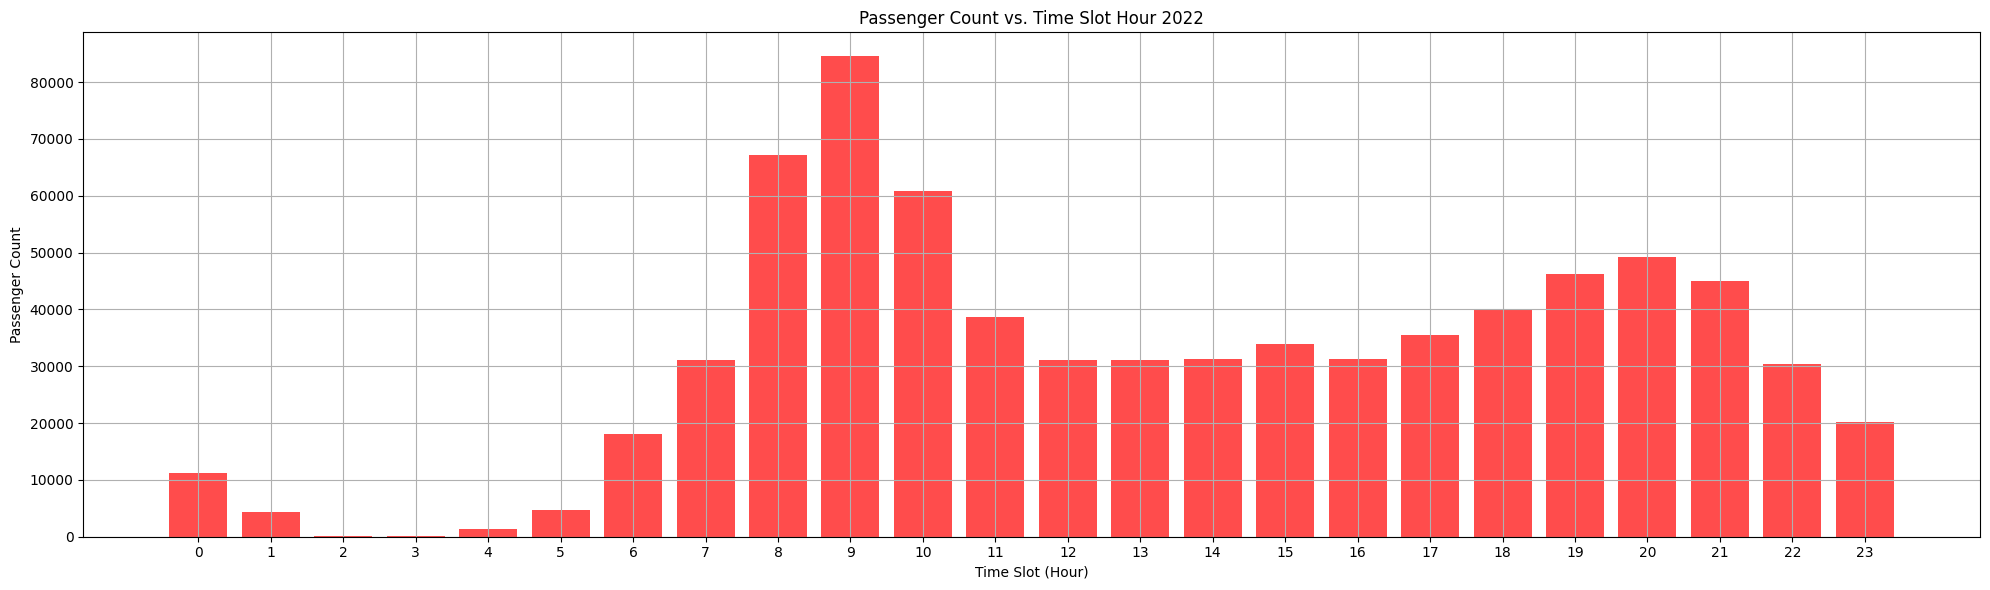

In [14]:
# Extract Hour from Date_Time
hour2022['Hour'] = hour2022['Date_Time'].dt.hour

# Calculate Time_Slot for 1-24 hours
hour2022['Time_Slot'] = hour2022['Hour']

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_hour = hour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(df_time_slot_hour['Time_Slot'], df_time_slot_hour['Passenger_Count'], color='r', alpha=0.7)

# Adding labels and title
plt.xlabel('Time Slot (Hour)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot Hour 2022')

# Set x-ticks to display all values from 1 to 24
plt.xticks(range(0, 24))

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_76/323559157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2023['Hour'] = hour2023['Date_Time'].dt.hour
/tmp/ipykernel_76/323559157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2023['Time_Slot'] = hour2023['Hour']


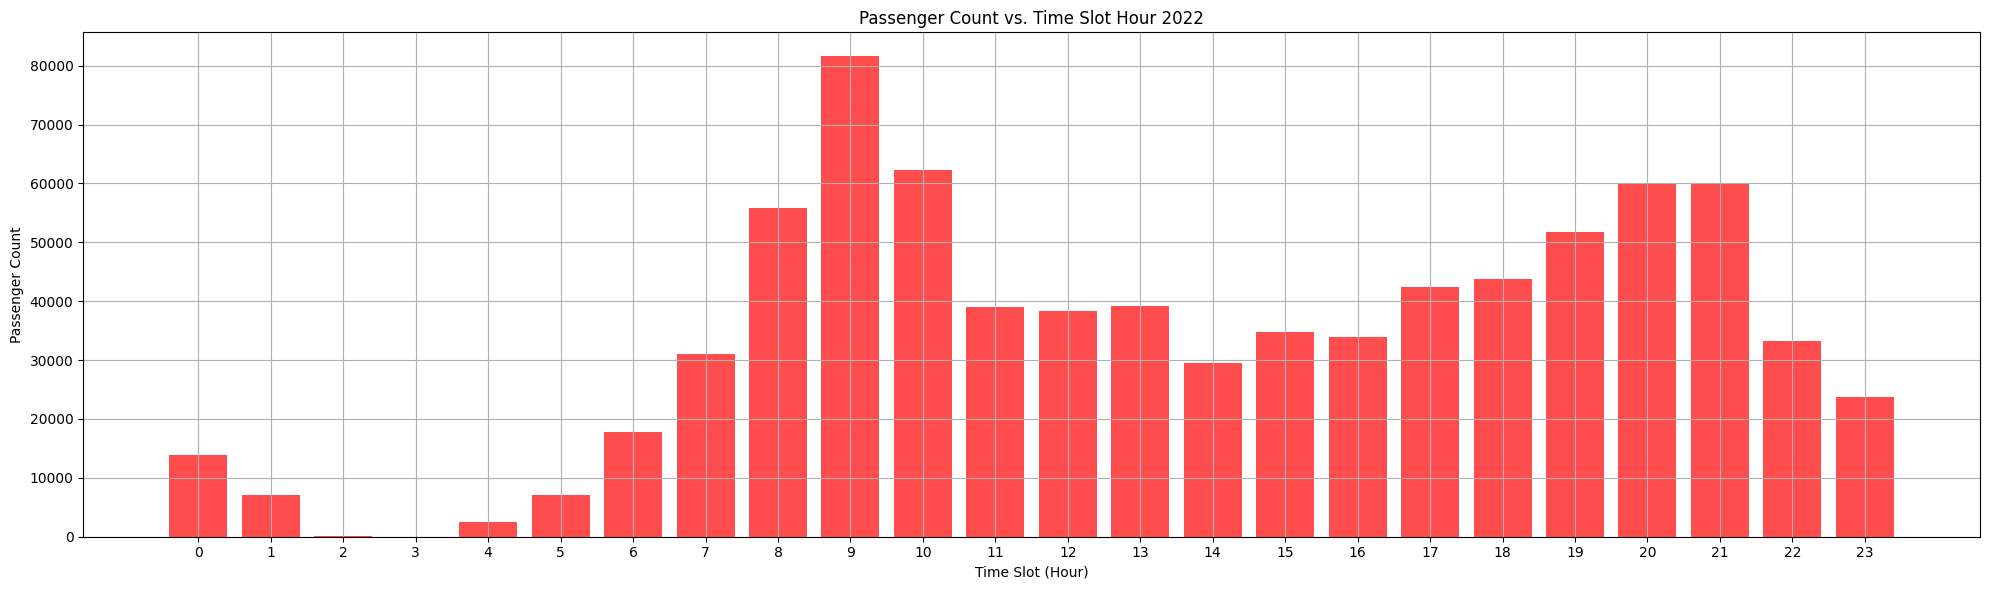

In [15]:
# Extract Hour from Date_Time
hour2023['Hour'] = hour2023['Date_Time'].dt.hour

# Calculate Time_Slot for 1-24 hours
hour2023['Time_Slot'] = hour2023['Hour']

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_hour = hour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(20, 6))
plt.bar(df_time_slot_hour['Time_Slot'], df_time_slot_hour['Passenger_Count'], color='r', alpha=0.7)

# Adding labels and title
plt.xlabel('Time Slot (Hour)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot Hour 2022')

# Set x-ticks to display all values from 1 to 24
plt.xticks(range(0, 24))

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_76/1405324182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2022['Hour'] = hour2022['Date_Time'].dt.hour
/tmp/ipykernel_76/1405324182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour2022['Time_Slot'] = hour2022['Hour']
/tmp/ipykernel_76/1405324182.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

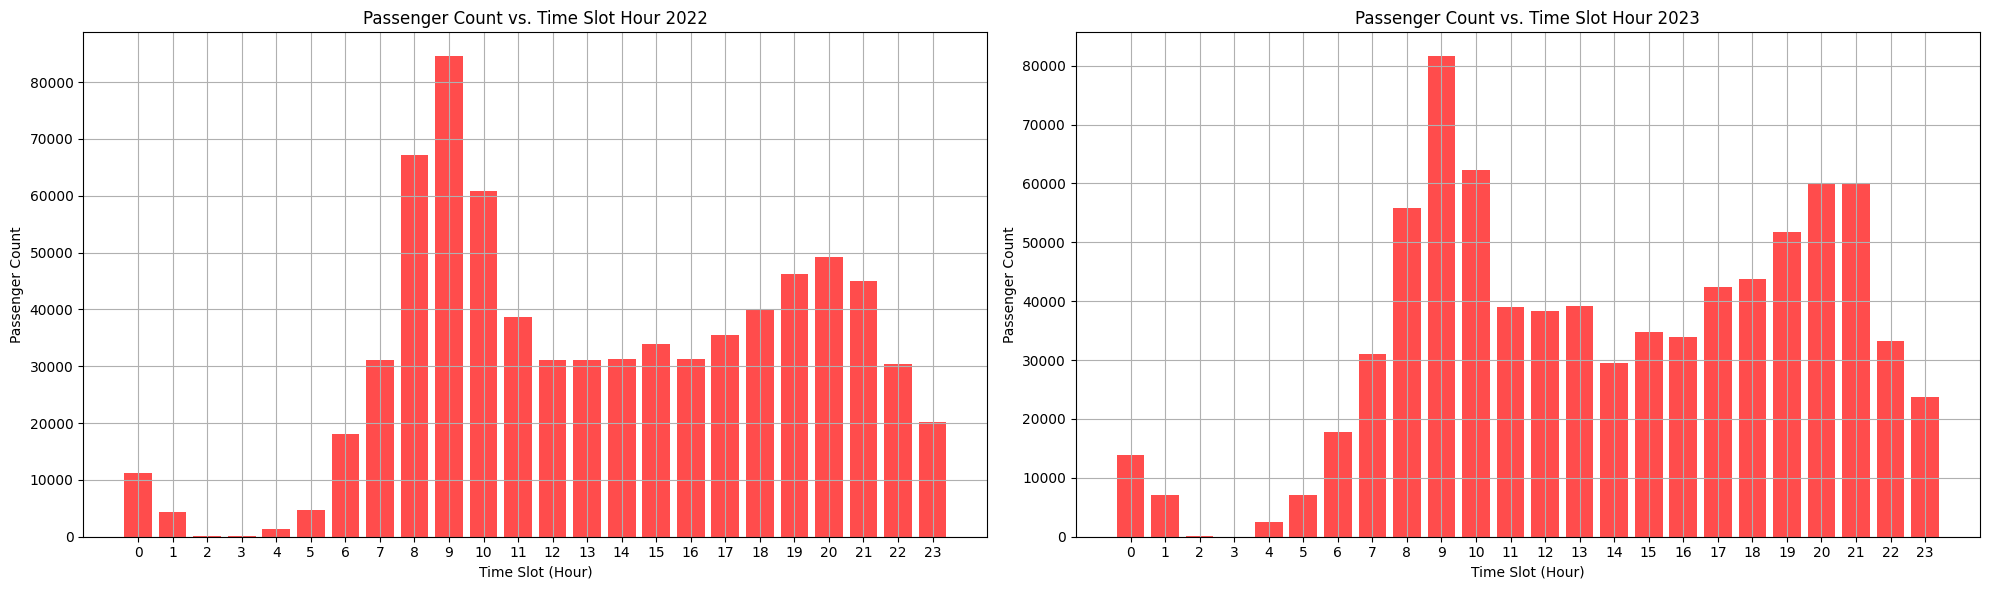

In [16]:

# For Hour 2022
hour2022['Hour'] = hour2022['Date_Time'].dt.hour
hour2022['Time_Slot'] = hour2022['Hour']
df_time_slot_hour_2022 = hour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting for Hour 2022
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.bar(df_time_slot_hour_2022['Time_Slot'], df_time_slot_hour_2022['Passenger_Count'], color='r', alpha=0.7)
plt.xlabel('Time Slot (Hour)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot Hour 2022')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

# For Hour 2023
hour2023['Hour'] = hour2023['Date_Time'].dt.hour
hour2023['Time_Slot'] = hour2023['Hour']
df_time_slot_hour_2023 = hour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Plotting for Hour 2023
plt.subplot(1, 2, 2)
plt.bar(df_time_slot_hour_2023['Time_Slot'], df_time_slot_hour_2023['Passenger_Count'], color='r', alpha=0.7)
plt.xlabel('Time Slot (Hour)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count vs. Time Slot Hour 2023')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

plt.show()

In [17]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For Half Hour 2022
halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
halfhour2022['Minute'] = halfhour2022['Date_Time'].dt.minute
halfhour2022['Time_Slot'] = halfhour2022['Hour'] * 2 + halfhour2022['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_2022 = halfhour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# For Half Hour 2023
halfhour2023['Date_Time'] = pd.to_datetime(halfhour2023['Date_Time'])
halfhour2023['Hour'] = halfhour2023['Date_Time'].dt.hour
halfhour2023['Minute'] = halfhour2023['Date_Time'].dt.minute
halfhour2023['Time_Slot'] = halfhour2023['Hour'] * 2 + halfhour2023['Minute'] // 30

# Group by Time_Slot and sum the Passenger_Count
df_time_slot_2023 = halfhour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# For Hour 2022
hour2022['Hour'] = hour2022['Date_Time'].dt.hour
hour2022['Time_Slot'] = hour2022['Hour']
df_time_slot_hour_2022 = hour2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# For Hour 2023
hour2023['Hour'] = hour2023['Date_Time'].dt.hour
hour2023['Time_Slot'] = hour2023['Hour']
df_time_slot_hour_2023 = hour2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

# Create the subplot
fig = make_subplots(rows=2, cols=2, subplot_titles=("Passenger Count vs. Time Slot for Half Hour 2022",
                                                   "Passenger Count vs. Time Slot for Half Hour 2023",
                                                   "Passenger Count vs. Time Slot Hour 2022",
                                                   "Passenger Count vs. Time Slot Hour 2023"))

# Plot the data for Half Hour 2022
fig.add_trace(go.Scatter(x=df_time_slot_2022['Time_Slot'], y=df_time_slot_2022['Passenger_Count'], mode='lines+markers'), row=1, col=1)
fig.add_hline(y=df_time_slot_2022['Passenger_Count'].min(), line_dash="dash", line_color="red", row=1, col=1)
fig.add_hline(y=df_time_slot_2022['Passenger_Count'].max(), line_dash="dash", line_color="green", row=1, col=1)

# Plot the data for Half Hour 2023
fig.add_trace(go.Scatter(x=df_time_slot_2023['Time_Slot'], y=df_time_slot_2023['Passenger_Count'], mode='lines+markers'), row=1, col=2)
fig.add_hline(y=df_time_slot_2023['Passenger_Count'].min(), line_dash="dash", line_color="red", row=1, col=2)
fig.add_hline(y=df_time_slot_2023['Passenger_Count'].max(), line_dash="dash", line_color="green", row=1, col=2)

# Plot the data for Hour 2022
fig.add_trace(go.Scatter(x=df_time_slot_hour_2022['Time_Slot'], y=df_time_slot_hour_2022['Passenger_Count'], mode='lines+markers'), row=2, col=1)
fig.add_hline(y=df_time_slot_hour_2022['Passenger_Count'].min(), line_dash="dash", line_color="red", row=2, col=1)
fig.add_hline(y=df_time_slot_hour_2022['Passenger_Count'].max(), line_dash="dash", line_color="green", row=2, col=1)

# Plot the data for Hour 2023
fig.add_trace(go.Scatter(x=df_time_slot_hour_2023['Time_Slot'], y=df_time_slot_hour_2023['Passenger_Count'], mode='lines+markers'), row=2, col=2)
fig.add_hline(y=df_time_slot_hour_2023['Passenger_Count'].min(), line_dash="dash", line_color="red", row=2, col=2)
fig.add_hline(y=df_time_slot_hour_2023['Passenger_Count'].max(), line_dash="dash", line_color="green", row=2, col=2)

# Adjust the layout
fig.update_layout(height=800, width=1200, title_text="Passenger Count vs. Time Slot", showlegend=False)

fig.show()

/tmp/ipykernel_76/2681675028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Date_Time'] = pd.to_datetime(halfhour2022['Date_Time'])
/tmp/ipykernel_76/2681675028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  halfhour2022['Hour'] = halfhour2022['Date_Time'].dt.hour
/tmp/ipykernel_76/2681675028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1. what's with the is_holiday and holiday_type dependency 
2. the timeslot - 48 , 24
3. station pair - thane - wagle depot 

## Passenger Count Trends by Time Slot and Month

This plot displays the trends in passenger count over different time slots for each month of the year. The blue line represents the passenger count for the 'halfhour' DataFrame, while the red line represents the passenger count for the 'hour' DataFrame.

Each subplot corresponds to a specific month, allowing you to observe the variations in passenger count patterns across different time slots and months. This information can be useful for understanding peak travel times, identifying trends, and making informed decisions about transportation planning and resource allocation.
"""

In [19]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the necessary data loaded into DataFrames

# Create a figure with 12 subplots (1 for each month)
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i+1}" for i in range(12)])

# Iterate over each month from 1 to 12
for month in range(1, 13):
    # Filter the data for the current month
    halfhour_month2022 = halfhour2022[halfhour2022['Month'] == month]
    hour_month2022 = hour2022[hour2022['Month'] == month]

    # Group by Time_Slot and sum the Passenger_Count for each month
    df_time_slot_halfhour2022 = halfhour_month2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
    df_time_slot_hour2022 = hour_month2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

    # Plot the data for the current month
    row = (month - 1) // 3 + 1
    col = (month - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df_time_slot_halfhour2022['Time_Slot'], y=df_time_slot_halfhour2022['Passenger_Count'], mode='lines', line=dict(color='blue'), showlegend=False), row=row, col=col)
    fig.add_trace(go.Scatter(x=df_time_slot_hour2022['Time_Slot'], y=df_time_slot_hour2022['Passenger_Count'], mode='lines', line=dict(color='red'), showlegend=False), row=row, col=col)

# Add a general title for all the subplots
fig.update_layout(
    title='Passenger Count Comparison for Half Hour and Hour Data 2022',
    title_x=0.5,
    height=800,
    width=1200,
    xaxis_title='Time Slot',
    yaxis_title='Passenger Count'
)

fig.show()


In [20]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the necessary data loaded into DataFrames

# Create a figure with 12 subplots (1 for each month)
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i+1}" for i in range(12)])

# Iterate over each month from 1 to 12
for month in range(1, 13):
    # Filter the data for the current month
    halfhour_month2023 = halfhour2023[halfhour2023['Month'] == month]
    hour_month2023 = hour2023[hour2023['Month'] == month]

    # Group by Time_Slot and sum the Passenger_Count for each month
    df_time_slot_halfhour2023 = halfhour_month2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
    df_time_slot_hour2023 = hour_month2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

    # Plot the data for the current month
    row = (month - 1) // 3 + 1
    col = (month - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=df_time_slot_halfhour2023['Time_Slot'], y=df_time_slot_halfhour2023['Passenger_Count'], mode='lines', line=dict(color='blue'), showlegend=False), row=row, col=col)
    fig.add_trace(go.Scatter(x=df_time_slot_hour2023['Time_Slot'], y=df_time_slot_hour2023['Passenger_Count'], mode='lines', line=dict(color='red'), showlegend=False), row=row, col=col)

# Add a general title for all the subplots
fig.update_layout(
    title='Passenger Count Comparison for Half Hour and Hour Data 2023',
    title_x=0.5,
    height=800,
    width=1200,
    xaxis_title='Time Slot',
    yaxis_title='Passenger Count'
)

fig.show()


### Weekends


In [110]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data for weekends (Weekday = 5 for Saturday, 6 for Sunday)
halfhour_weekend2022 = halfhour2022[halfhour2022['Weekday'].isin([5, 6])]
hour_weekend2022 = hour2022[hour2022['Weekday'].isin([5, 6])]

# Create a figure with 12 subplots (1 for each month)
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i+1}" for i in range(12)])

# Iterate over each month from 1 to 12
for month in range(1, 13):
    # Filter the data for the current month
    halfhour_month2022 = halfhour_weekend2022[halfhour_weekend2022['Month'] == month]
    hour_month2022 = hour_weekend2022[hour_weekend2022['Month'] == month]

    # Group by Time_Slot and sum the Passenger_Count for each month
    df_time_slot_halfhour2022 = halfhour_month2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
    df_time_slot_hour2022 = hour_month2022.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

    # Plot the 'halfhour' and 'hour' data on the current subplot
    fig.add_trace(go.Scatter(x=df_time_slot_halfhour2022['Time_Slot'], y=df_time_slot_halfhour2022['Passenger_Count'], mode='lines', name='Halfhour', line=dict(color='blue')), row=(month-1) // 3 + 1, col=(month-1) % 3 + 1)
    fig.add_trace(go.Scatter(x=df_time_slot_hour2022['Time_Slot'], y=df_time_slot_hour2022['Passenger_Count'], mode='lines', name='Hour', line=dict(color='red')), row=(month-1) // 3 + 1, col=(month-1) % 3 + 1)

# Update layout for the figure
fig.update_layout(
    title='Passenger Count Comparison for Half Hour and Hour Data on Weekends - 2022',
    xaxis_title='Time Slot',
    yaxis_title='Passenger Count',
    height=800,
    width=1200
)

# Show the interactive plot
fig.show()


In [22]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the data for weekends (Weekday = 5 for Saturday, 6 for Sunday)
halfhour_weekend2023 = halfhour2023[halfhour2023['Weekday'].isin([5, 6])]
hour_weekend2023 = hour2023[hour2023['Weekday'].isin([5, 6])]

# Create a figure with 12 subplots (1 for each month)
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i+1}" for i in range(12)])

# Iterate over each month from 1 to 12
for month in range(1, 13):
    # Filter the data for the current month
    halfhour_month2023 = halfhour_weekend2023[halfhour_weekend2023['Month'] == month]
    hour_month2023 = hour_weekend2023[hour_weekend2023['Month'] == month]

    # Group by Time_Slot and sum the Passenger_Count for each month
    df_time_slot_halfhour2023 = halfhour_month2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()
    df_time_slot_hour2023 = hour_month2023.groupby('Time_Slot')['Passenger_Count'].sum().reset_index()

    # Plot the 'halfhour' and 'hour' data on the current subplot
    fig.add_trace(go.Scatter(x=df_time_slot_halfhour2023['Time_Slot'], y=df_time_slot_halfhour2023['Passenger_Count'], mode='lines', name='Halfhour', line=dict(color='blue')), row=(month-1) // 3 + 1, col=(month-1) % 3 + 1)
    fig.add_trace(go.Scatter(x=df_time_slot_hour2023['Time_Slot'], y=df_time_slot_hour2023['Passenger_Count'], mode='lines', name='Hour', line=dict(color='red')), row=(month-1) // 3 + 1, col=(month-1) % 3 + 1)

# Update layout for the figure
fig.update_layout(
    title='Passenger Count Comparison for Half Hour and Hour Data on Weekends 2023',
    xaxis_title='Time Slot',
    yaxis_title='Passenger Count',
    height=800,
    width=1200
)

# Show the interactive plot
fig.show()


## Box Plot of Yearly vs. Quarterly Passenger Count Values

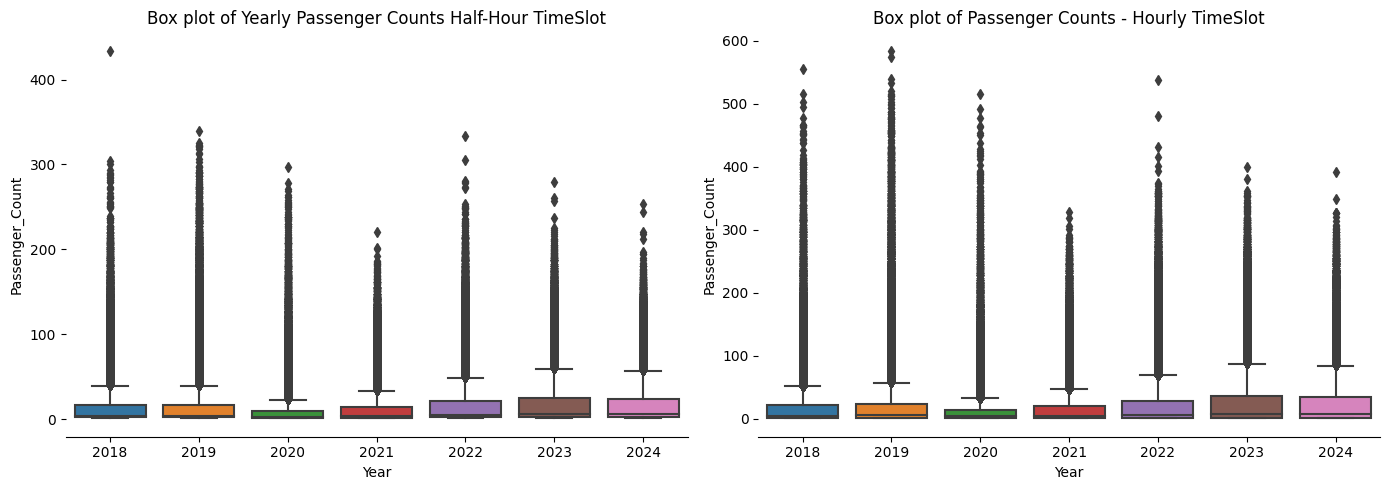

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Passenger_Count", data=halfhour)
plt.xlabel('Year')
plt.title('Box plot of Yearly Passenger Counts Half-Hour TimeSlot')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="Year", y="Passenger_Count", data=hour)
plt.xlabel('Year')
plt.title('Box plot of Passenger Counts - Hourly TimeSlot')
sns.despine(left=True)
plt.tight_layout();

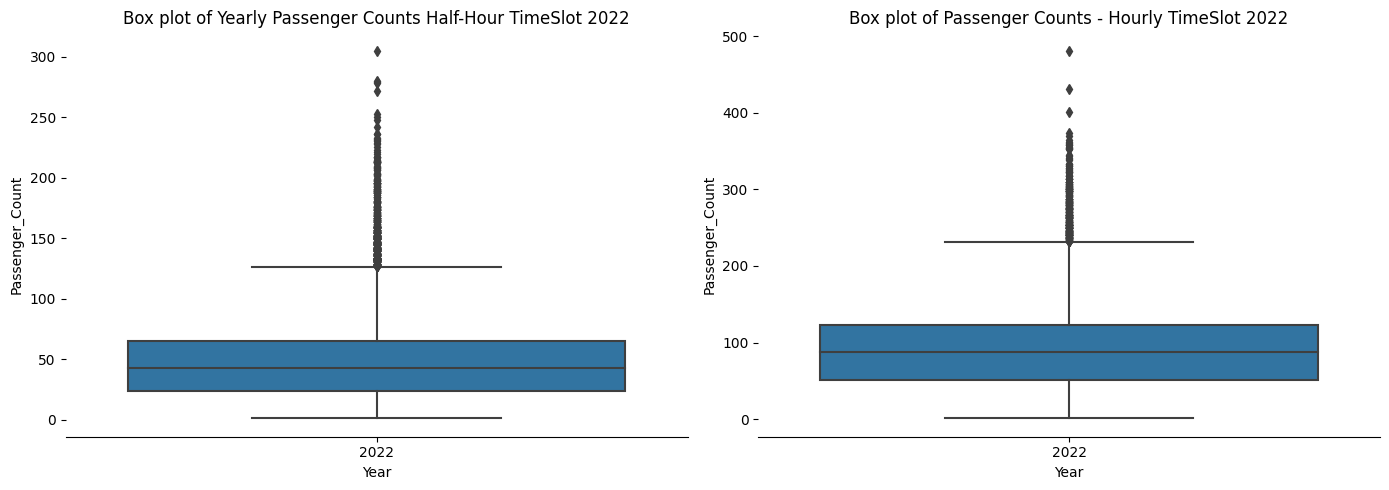

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Passenger_Count", data=halfhour2022)
plt.xlabel('Year')
plt.title('Box plot of Yearly Passenger Counts Half-Hour TimeSlot 2022')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="Year", y="Passenger_Count", data=hour2022)
plt.xlabel('Year')
plt.title('Box plot of Passenger Counts - Hourly TimeSlot 2022')
sns.despine(left=True)
plt.tight_layout();

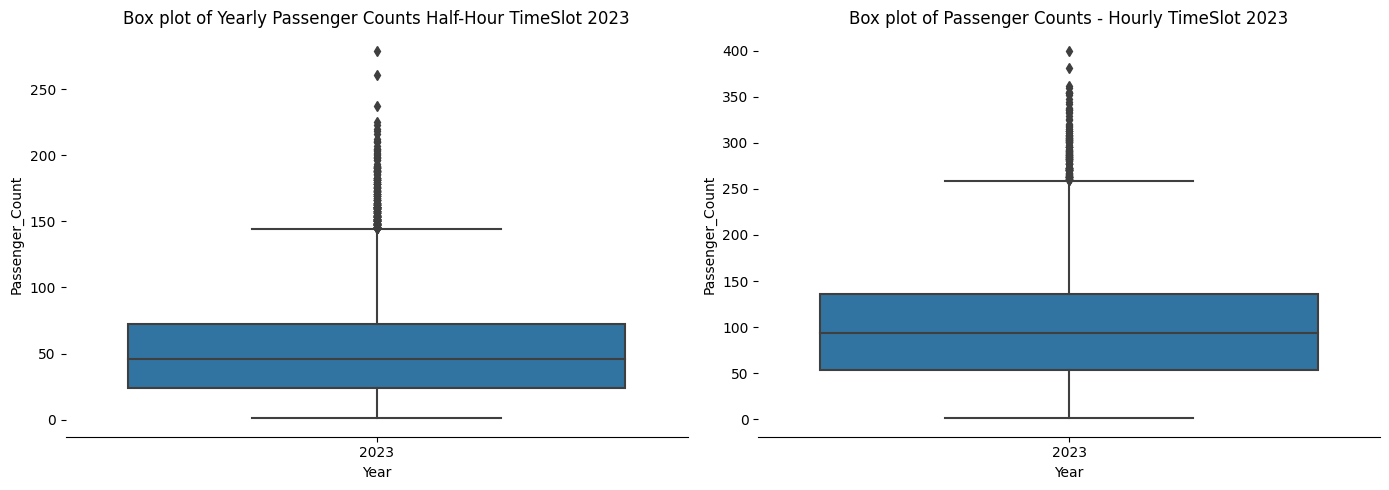

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="Year", y="Passenger_Count", data=halfhour2023)
plt.xlabel('Year')
plt.title('Box plot of Yearly Passenger Counts Half-Hour TimeSlot 2023')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="Year", y="Passenger_Count", data=hour2023)
plt.xlabel('Year')
plt.title('Box plot of Passenger Counts - Hourly TimeSlot 2023')
sns.despine(left=True)
plt.tight_layout();

# Average Passenger Counts Resampled Over Day, Week, Month, Quarter and Year


In [26]:
halfhour2022.index = pd.to_datetime(halfhour2022.index)
halfhour2023.index = pd.to_datetime(halfhour2023.index)
hour2022.index = pd.to_datetime(hour2022.index)
hour2023.index = pd.to_datetime(hour2023.index)

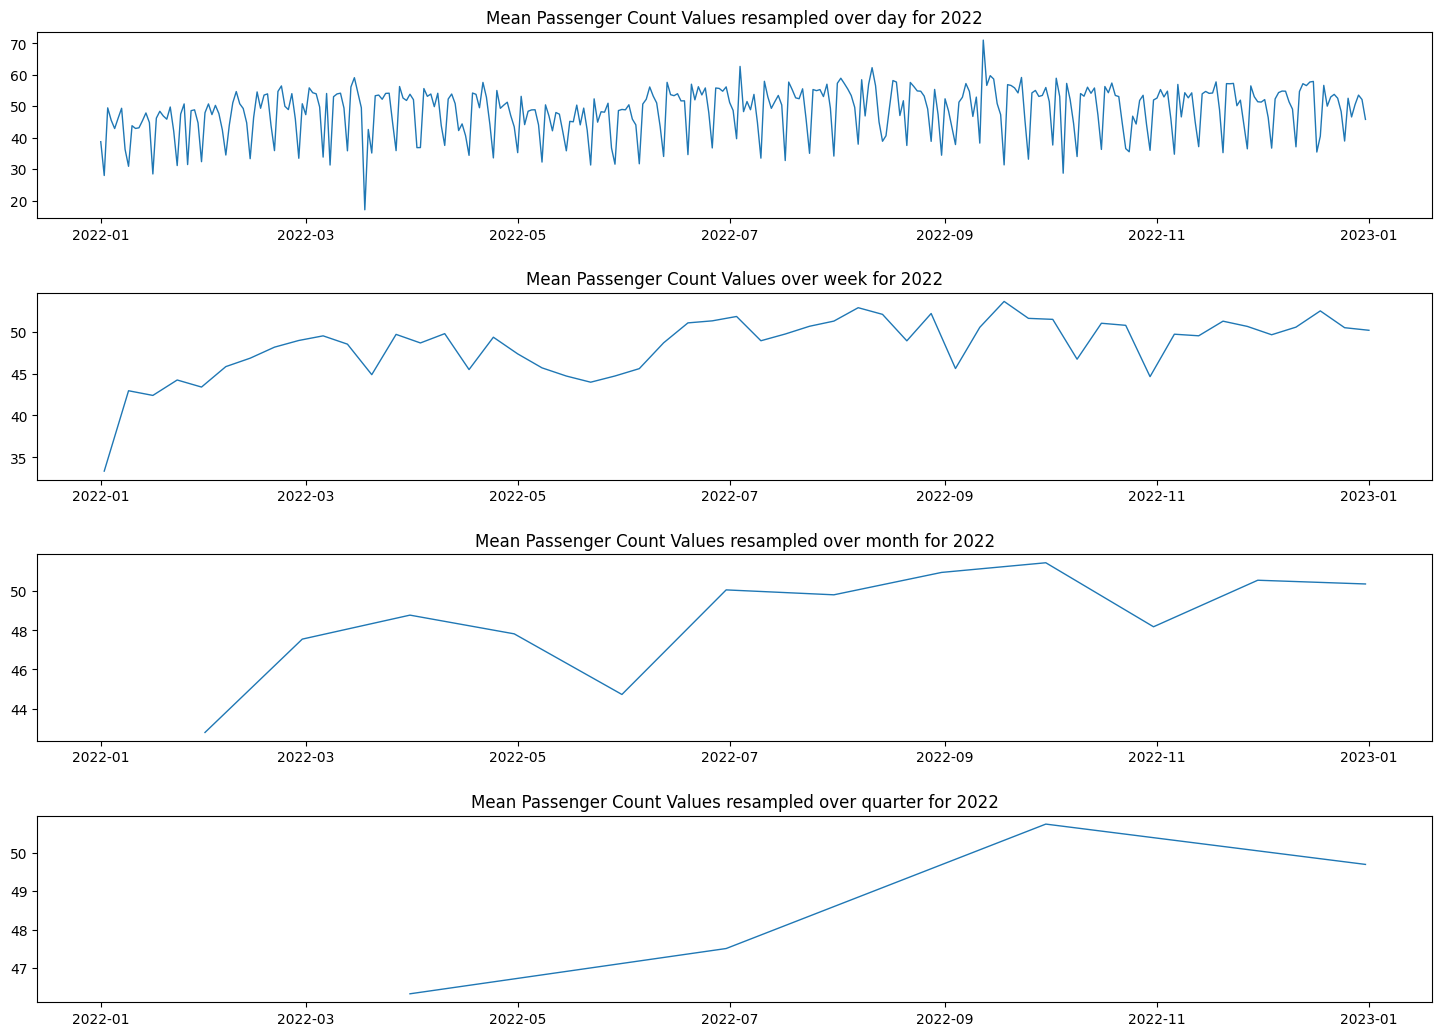

In [27]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(halfhour2022['Passenger_Count'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Passenger Count Values resampled over day for 2022')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(halfhour2022['Passenger_Count'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Passenger Count Values over week for 2022')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(halfhour2022['Passenger_Count'].resample('ME').mean(),linewidth=1)
ax3.set_title('Mean Passenger Count Values resampled over month for 2022')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(halfhour2022['Passenger_Count'].resample('QE').mean(),linewidth=1)
ax4.set_title('Mean Passenger Count Values resampled over quarter for 2022')
ax4.tick_params(axis='both', which='major')


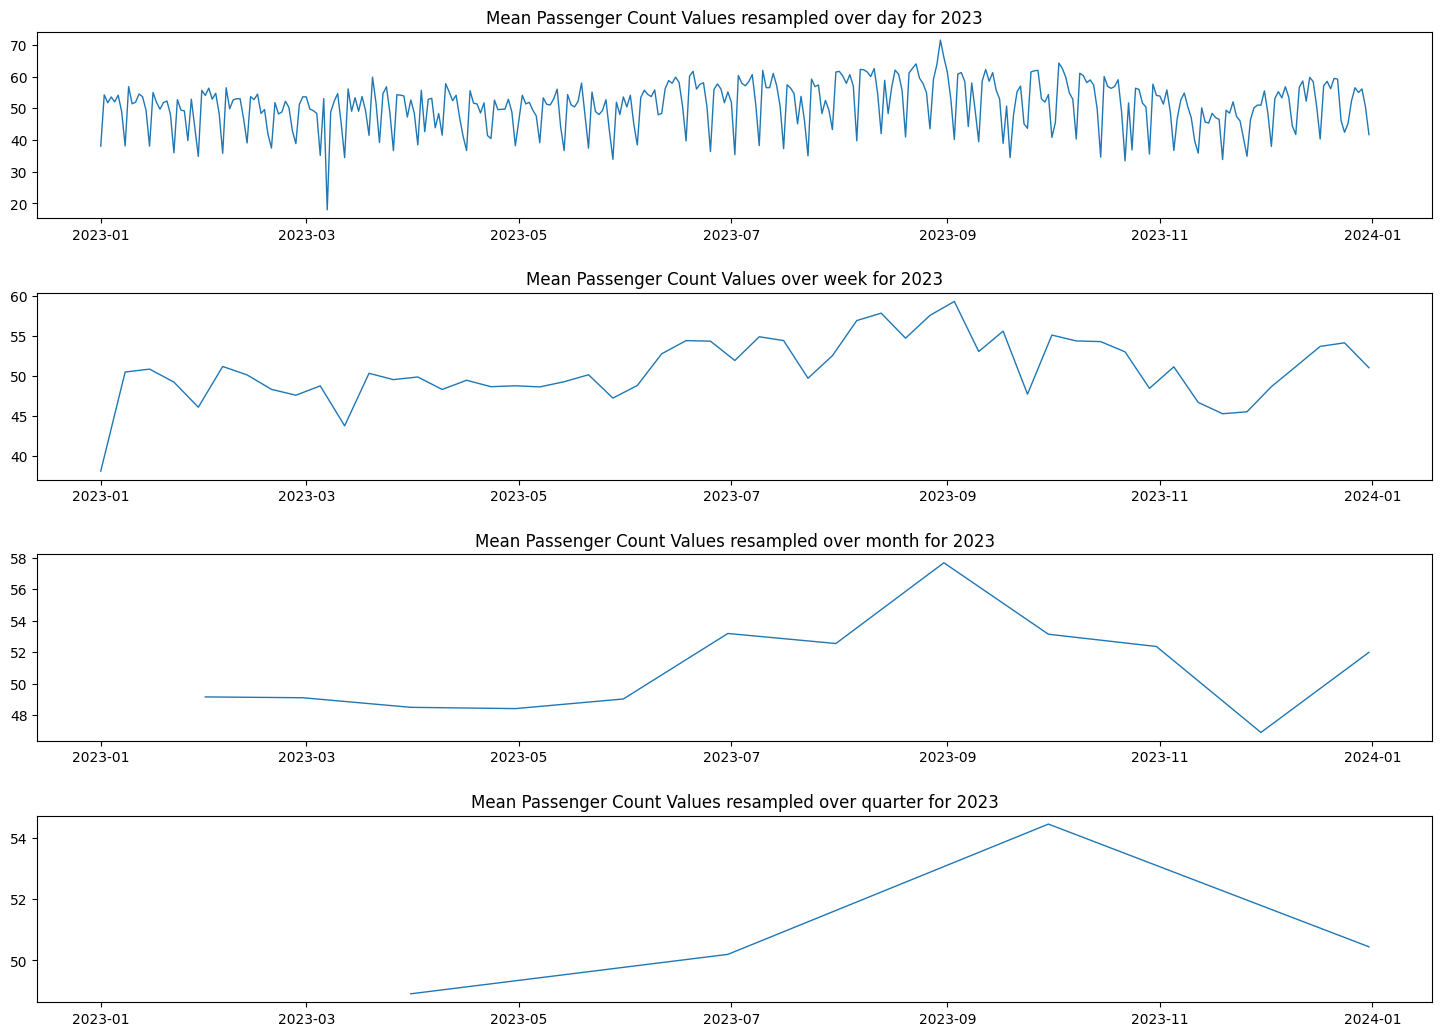

In [28]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(halfhour2023['Passenger_Count'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Passenger Count Values resampled over day for 2023')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(halfhour2023['Passenger_Count'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Passenger Count Values over week for 2023')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(halfhour2023['Passenger_Count'].resample('ME').mean(),linewidth=1)
ax3.set_title('Mean Passenger Count Values resampled over month for 2023')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(halfhour2023['Passenger_Count'].resample('QE').mean(),linewidth=1)
ax4.set_title('Mean Passenger Count Values resampled over quarter for 2023')
ax4.tick_params(axis='both', which='major')

### Holiday Types Dict

In [35]:
#Map Holiday to 1
# Dictionary mapping dates to holiday types
holiday = {
    "2018-01-26": 1,  # Republic Day
    "2019-01-26": 1,  # Republic Day
    "2020-01-26": 1,  # Republic Day
    "2021-01-26": 1,  # Republic Day
    "2022-01-26": 1,  # Republic Day
    "2023-01-26": 1,  # Republic Day
    "2018-02-19": 1,  # Shivaji Jayanti
    "2019-02-19": 1,  # Shivaji Jayanti
    "2020-02-19": 1,  # Shivaji Jayanti
    "2021-02-19": 1,  # Shivaji Jayanti
    "2022-02-19": 1,  # Shivaji Jayanti
    "2023-02-19": 1,  # Shivaji Jayanti
    "2018-12-25": 1,  # Christmas
    "2019-12-25": 1,  # Christmas
    "2020-12-25": 1,  # Christmas
    "2021-12-25": 1,  # Christmas
    "2022-12-25": 1,  # Christmas
    "2023-12-25": 1,  # Christmas
    "2018-02-13": 1,  # Mahashivratri
    "2019-03-04": 1,  # Mahashivratri
    "2020-02-21": 1,  # Mahashivratri
    "2021-03-11": 1,  # Mahashivratri
    "2022-03-01": 1,  # Mahashivratri
    "2023-02-18": 1,  # Mahashivratri
    "2018-03-02": 1,  # Holi
    "2019-03-21": 1,  # Holi
    "2020-03-10": 1,  # Holi
    "2021-03-29": 1,  # Holi
    "2022-03-18": 1,  # Holi
    "2023-03-07": 1,  # Holi
    "2018-03-18": 1,  # Gudipadwa
    "2019-04-06": 1,  # Gudipadwa
    "2020-03-25": 1,  # Gudipadwa
    "2021-04-13": 1,  # Gudipadwa
    "2022-04-02": 1,  # Gudipadwa
    "2023-03-22": 1,  # Gudipadwa
    "2018-03-25": 1,  # Ram navmi
    "2019-04-14": 1,  # Ram navmi
    "2020-04-02": 1,  # Ram navmi
    "2021-04-21": 1,  # Ram navmi
    "2022-04-10": 1,  # Ram navmi
    "2023-03-30": 1,  # Ram navmi
    "2018-03-29": 1,  # Mahavir Jayanti
    "2019-03-17": 1,  # Mahavir Jayanti
    "2020-04-06": 1,  # Mahavir Jayanti
    "2021-04-25": 1,  # Mahavir Jayanti
    "2022-04-14": 1,  # Mahavir Jayanti
    "2023-04-04": 1,  # Mahavir Jayanti
    "2018-04-14": 1,  # Aambedkar Jayanti
    "2019-04-14": 1,  # Aambedkar Jayanti
    "2020-04-14": 1,  # Aambedkar Jayanti
    "2021-04-14": 1,  # Aambedkar Jayanti
    "2022-04-14": 1,  # Aambedkar Jayanti
    "2023-04-14": 1,  # Aambedkar Jayanti
    "2018-03-30": 1,  # Good friday
    "2019-04-19": 1,  # Good friday
    "2020-04-10": 1,  # Good friday
    "2021-04-02": 1,  # Good friday
    "2022-04-15": 1,  # Good friday
    "2023-04-07": 1,  # Good friday
    "2018-06-16": 1,  # Ramzan
    "2019-06-05": 1,  # Ramzan
    "2020-05-25": 1,  # Ramzan
    "2021-05-13": 1,  # Ramzan
    "2022-05-03": 1,  # Ramzan
    "2023-04-22": 1,  # Ramzan
    "2018-05-01": 1,  # Maharashtra Day
    "2019-05-01": 1,  # Maharashtra Day
    "2020-05-01": 1,  # Maharashtra Day
    "2021-05-01": 1,  # Maharashtra Day
    "2022-05-01": 1,  # Maharashtra Day
    "2023-05-01": 1,  # Maharashtra Day
    "2018-04-30": 1,  # Buddha Purnima
    "2019-05-18": 1,  # Buddha Purnima
    "2020-05-07": 1,  # Buddha Purnima
    "2021-05-26": 1,  # Buddha Purnima
    "2022-05-16": 1,  # Buddha Purnima
    "2023-05-05": 1,  # Buddha Purnima
    "2018-08-22": 1,  # Bakri Eid
    "2019-08-12": 1,  # Bakri Eid
    "2020-08-01": 1,  # Bakri Eid
    "2021-07-21": 1,  # Bakri Eid
    "2022-07-10": 1,  # Bakri Eid
    "2023-06-28": 1,  # Bakri Eid
    "2018-09-21": 1,  # Moharum
    "2019-09-10": 1,  # Moharum
    "2020-08-30": 1,  # Moharum
    "2021-09-19": 1,  # Moharum
    "2022-08-09": 1,  # Moharum
    "2023-07-29": 1,  # Moharum
    "2018-08-15": 1,  # Independence Day
    "2019-08-15": 1,  # Independence Day
    "2020-08-15": 1,  # Independence Day
    "2021-08-15": 1,  # Independence Day
    "2022-08-15": 1,  # Independence Day
    "2023-08-15": 1,  # Independence Day
    "2018-08-17": 1,  # Pateti
    "2019-08-17": 1,  # Pateti
    "2020-08-16": 1,  # Pateti
    "2021-08-16": 1,  # Pateti
    "2022-08-16": 1,  # Pateti
    "2023-08-16": 1,  # Pateti
    "2018-09-13": 1,  # Ganesh Chaturthi
    "2019-09-02": 1,  # Ganesh Chaturthi
    "2020-08-22": 1,  # Ganesh Chaturthi
    "2021-09-10": 1,  # Ganesh Chaturthi
    "2022-08-31": 1,  # Ganesh Chaturthi
    "2023-09-19": 1,  # Ganesh Chaturthi
    "2018-10-02": 1,  # Gandhi Jayanti
    "2019-10-02": 1,  # Gandhi Jayanti
    "2020-10-02": 1,  # Gandhi Jayanti
    "2021-10-02": 1,  # Gandhi Jayanti
    "2022-10-02": 1,  # Gandhi Jayanti
    "2023-10-02": 1,  # Gandhi Jayanti
    "2018-09-21": 1,  # Eid A Milad
    "2019-09-10": 1,  # Eid A Milad
    "2020-08-30": 1,  # Eid A Milad
    "2021-08-10": 1,  # Eid A Milad
    "2022-10-09": 1,  # Eid A Milad
    "2023-09-28": 1,  # Eid A Milad
    "2018-10-19": 1,  # Dashera
    "2019-10-08": 1,  # Dashera
    "2020-10-25": 1,  # Dashera
    "2021-10-15": 1,  # Dashera
    "2022-10-05": 1,  # Dashera
    "2023-10-24": 1,  # Dashera
    "2018-11-05": 1,  # Dhanteras
    "2019-10-25": 1,  # Dhanteras
    "2020-11-12": 1,  # Dhanteras
    "2021-11-02": 1,  # Dhanteras
    "2022-10-24": 1,  # Dhanteras
    "2023-11-12": 1,  # Dhanteras
    "2018-11-06": 1,  # Kali Chaudas
    "2019-10-26": 1,  # Kali Chaudas
    "2020-11-13": 1,  # Kali Chaudas
    "2021-11-03": 1,  # Kali Chaudas
    "2022-10-25": 1,  # Kali Chaudas
    "2023-11-13": 1,  # Kali Chaudas
    "2018-11-07": 1,  # Diwali
    "2019-10-27": 1,  # Diwali
    "2020-11-14": 1,  # Diwali
    "2021-11-04": 1,  # Diwali
    "2022-10-26": 1,  # Diwali
    "2023-11-14": 1,  # Diwali
    "2018-11-08": 1,  # New Year
    "2019-10-28": 1,  # New Year
    "2020-11-15": 1,  # New Year
    "2021-11-05": 1,  # New Year
    "2022-10-27": 1,  # New Year
    "2023-11-15": 1,  # New Year
    "2018-11-09": 1,  # Bhaiduj
    "2019-10-29": 1,  # Bhaiduj
    "2020-11-16": 1,  # Bhaiduj
    "2021-11-06": 1,  # Bhaiduj
    "2022-10-28": 1,  # Bhaiduj
    "2023-11-16": 1,  # Bhaiduj
    "2018-11-23": 1,  # Guru Nanak Jayanti
    "2019-11-12": 1,  # Guru Nanak Jayanti
    "2020-11-30": 1,  # Guru Nanak Jayanti
    "2021-11-19": 1,  # Guru Nanak Jayanti
    "2022-11-08": 1,  # Guru Nanak Jayanti
    "2023-11-27": 1,  # Guru Nanak Jayanti
}
   



In [40]:
Holiday_Types = {
    "2022-01-26": 1,  # Republic Day
    "2023-01-26": 1,  # Republic Day
    "2022-02-19": 2,  # Shivaji Jayanti
    "2023-02-19": 2,  # Shivaji Jayanti
    "2022-12-25": 3,  # Christmas
    "2023-12-25": 3,  # Christmas
    "2022-03-01": 4,  # Mahashivratri
    "2023-02-18": 4,  # Mahashivratri
    "2022-03-18": 5,  # Holi
    "2023-03-07": 5,  # Holi
    "2022-04-02": 6,  # Gudipadwa
    "2023-03-22": 6,  # Gudipadwa
    "2022-04-10": 7,  # Ram Navami
    "2023-03-30": 7,  # Ram Navami
    "2022-04-14": 8,  # Mahavir Jayanti
    "2023-04-04": 8,  # Mahavir Jayanti
    "2022-04-14": 9,  # Ambedkar Jayanti
    "2023-04-14": 9,  # Ambedkar Jayanti
    "2022-04-15": 10,  # Good Friday
    "2023-04-07": 10,  # Good Friday
    "2022-05-03": 11,  # Ramzan
    "2023-04-22": 11,  # Ramzan
    "2022-05-01": 12,  # Maharashtra Day
    "2023-05-01": 12,  # Maharashtra Day
    "2022-05-16": 13,  # Buddha Purnima
    "2023-05-05": 13,  # Buddha Purnima
    "2022-07-10": 14,  # Bakri Eid
    "2023-06-28": 14,  # Bakri Eid
    "2022-08-09": 15,  # Moharum
    "2023-07-29": 15,  # Moharum
    "2022-08-15": 16,  # Independence Day
    "2023-08-15": 16,  # Independence Day
    "2022-08-16": 17,  # Parsi New Year
    "2023-08-16": 17,  # Parsi New Year
    "2022-08-31": 18,  # Ganesh Chaturthi
    "2023-09-19": 18,  # Ganesh Chaturthi
    "2022-10-02": 19,  # Gandhi Jayanti
    "2023-10-02": 19,  # Gandhi Jayanti
    "2022-10-09": 20,  # Eid al-Adha
    "2023-09-28": 20,  # Eid al-Adha
    "2022-10-05": 21,  # Dussehra
    "2023-10-24": 21,  # Dussehra
    "2022-10-24": 22,  # Dhanteras
    "2023-11-12": 22,  # Dhanteras
    "2022-10-25": 23,  # Kali Chaudas
    "2023-11-13": 23,  # Kali Chaudas
    "2022-10-26": 24,  # Diwali
    "2023-11-14": 24,  # Diwali
    "2022-10-27": 25,  # New Year
    "2023-11-15": 25,  # New Year
    "2022-10-28": 26,  # Bhai Dooj
    "2023-11-16": 26,  # Bhai Dooj
    "2022-11-08": 27,  # Guru Nanak Jayanti
    "2023-11-27": 27,  # Guru Nanak Jayanti
}


In [43]:
unique_holiday_type_pairs = set(Holiday_Types.items())
print("Unique key-value pairs:")
for pair in unique_holiday_type_pairs:
    print(f"{pair[0]}: {pair[1]}")

Unique key-value pairs:
2022-10-02: 19
2022-04-15: 10
2022-10-24: 22
2022-10-28: 26
2023-12-25: 3
2023-10-02: 19
2023-05-05: 13
2023-08-15: 16
2023-04-14: 9
2023-08-16: 17
2022-10-25: 23
2022-03-01: 4
2023-01-26: 1
2022-07-10: 14
2022-12-25: 3
2023-02-19: 2
2022-04-14: 9
2022-02-19: 2
2022-10-27: 25
2023-11-15: 25
2022-04-10: 7
2023-11-12: 22
2023-04-22: 11
2022-10-26: 24
2022-01-26: 1
2022-03-18: 5
2023-11-14: 24
2023-05-01: 12
2023-10-24: 21
2022-04-02: 6
2022-05-01: 12
2022-08-31: 18
2023-06-28: 14
2022-08-09: 15
2022-10-05: 21
2022-11-08: 27
2023-04-07: 10
2022-10-09: 20
2022-05-16: 13
2023-03-22: 6
2022-08-16: 17
2023-07-29: 15
2023-03-30: 7
2023-11-27: 27
2023-11-13: 23
2023-09-19: 18
2023-11-16: 26
2023-09-28: 20
2023-04-04: 8
2022-05-03: 11
2023-03-07: 5
2022-08-15: 16
2023-02-18: 4


# Aggregate Passenger Count 

In [184]:
hour2023.head()

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,OneHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type,Hour,Time_Slot
Date_Time,,,,,,,,,,,,,,
2023-04-20 09:00:00,274276,17,16,Thane Station(Satis)-Wagle Depot,2023,4,3,10,2023-04-20 09:00:00,1,0,0,9,9
2023-01-02 00:00:00,387301,17,20,Thane Station(Satis)-Wagle Depot,2023,1,0,1,2023-01-02 00:00:00,69,0,0,0,0
2023-01-09 00:00:00,387302,17,20,Thane Station(Satis)-Wagle Depot,2023,1,0,1,2023-01-09 00:00:00,50,0,0,0,0
2023-01-16 00:00:00,387303,17,20,Thane Station(Satis)-Wagle Depot,2023,1,0,1,2023-01-16 00:00:00,44,0,0,0,0
2023-01-23 00:00:00,387304,17,20,Thane Station(Satis)-Wagle Depot,2023,1,0,1,2023-01-23 00:00:00,21,0,0,0,0


In [187]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have the necessary data loaded into DataFrames
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the Number of Holidays
holiday_counts_2022 = hour2022['Is_Holiday'].groupby([hour2022['Month'], hour2022['Weekday']]).sum()
holiday_counts_2023 = hour2023['Is_Holiday'].groupby([hour2023['Month'], hour2023['Weekday']]).sum()

# Create DataFrames for the plots
plot_data_2022 = pd.DataFrame({
    'Month': hour2022['Month'].unique().repeat(7),  # Repeat each month 7 times for each weekday
    'Weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] * len(months),  # Repeat weekdays for each month
    'Passenger Count': hour2022.groupby(['Month', 'Weekday'])['Passenger_Count'].sum().values,
    'Number of Holidays': holiday_counts_2022.values
})

plot_data_2023 = pd.DataFrame({
    'Month': hour2023['Month'].unique().repeat(7),
    'Weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] * len(months),
    'Passenger Count': hour2023.groupby(['Month', 'Weekday'])['Passenger_Count'].sum().values,
    'Number of Holidays': holiday_counts_2023.values
})

# Create the subplots
fig = go.Figure(data=[
    go.Heatmap(x=plot_data_2022['Weekday'], y=plot_data_2022['Month'], z=plot_data_2022['Passenger Count'], name='2022'),
    go.Heatmap(x=plot_data_2023['Weekday'], y=plot_data_2023['Month'], z=plot_data_2023['Passenger Count'], name='2023')
])

# Update the layout
fig.update_layout(title='Passenger Count by Month and Weekday in 2022 and 2023',
                  xaxis_title='Weekday', yaxis_title='Month',
                  width=1200,  # Adjust the width as needed
                  height=600)  # Adjust the height as needed

fig.show()

In [114]:
import plotly.graph_objects as go
import pandas as pd

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the Number of Holidays
holiday_counts_2022 = hour2022['Is_Holiday'].groupby(hour2022['Month']).sum()
holiday_counts_2023 = hour2023['Is_Holiday'].groupby(hour2023['Month']).sum()

# Create DataFrames for the plots
plot_data_2022 = pd.DataFrame({
    'Month': months,
    'Passenger Count': hour2022['Passenger_Count'].groupby(hour2022['Month']).sum(),
    'Number of Holidays': holiday_counts_2022
})

plot_data_2023 = pd.DataFrame({
    'Month': months,
    'Passenger Count': hour2023['Passenger_Count'].groupby(hour2023['Month']).sum(),
    'Number of Holidays': holiday_counts_2023
})

# Create the subplots
fig = go.Figure(data=[
    go.Line(x=plot_data_2022['Month'], y=plot_data_2022['Passenger Count'], name='2022'),
    go.Line(x=plot_data_2023['Month'], y=plot_data_2023['Passenger Count'], name='2023')
])

# Update the layout
fig.update_layout(title='Passenger Count for All Months in 2022 and 2023',
                  xaxis_title='Month', yaxis_title='Passenger Count',
                  xaxis=dict(domain=[0, 0.45]),
                  yaxis=dict(domain=[0, 1]),
                  legend=dict(x=0.7, y=1.1),
                  width=1200,  # Adjust the width as needed
                  height=600)  # Adjust the height as needed

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [118]:
nov2022 = hour2022[(hour2022['Month'] == 11)]
nov2023 = hour2023[(hour2023['Month'] == 11)]

In [139]:
nov2023

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,OneHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type,Hour,Time_Slot
Date_Time,,,,,,,,,,,,,,
2023-11-06 00:00:00,393996,17,20,Thane Station(Satis)-Wagle Depot,2023,11,0,1,2023-11-06 00:00:00,22,0,0,0,0
2023-11-13 00:00:00,393997,17,20,Thane Station(Satis)-Wagle Depot,2023,11,0,1,2023-11-13 00:00:00,15,1,23,0,0
2023-11-20 00:00:00,393998,17,20,Thane Station(Satis)-Wagle Depot,2023,11,0,1,2023-11-20 00:00:00,48,0,0,0,0
2023-11-27 00:00:00,393999,17,20,Thane Station(Satis)-Wagle Depot,2023,11,0,1,2023-11-27 00:00:00,33,1,27,0,0
2023-11-06 01:00:00,394000,17,20,Thane Station(Satis)-Wagle Depot,2023,11,0,2,2023-11-06 01:00:00,26,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 17:00:00,400820,17,21,Thane Station(Satis)-Wagle Depot,2023,11,1,18,2023-11-14 17:00:00,19,1,24,17,17
2023-11-02 10:00:00,400821,17,21,Thane Station(Satis)-Wagle Depot,2023,11,3,11,2023-11-02 10:00:00,1,0,0,10,10
2023-11-02 11:00:00,400822,17,21,Thane Station(Satis)-Wagle Depot,2023,11,3,12,2023-11-02 11:00:00,2,0,0,11,11


In [142]:
# Assuming you have the 'nov2023' DataFrame
holiday_count = len(nov2023[nov2023['Is_Holiday'] == 1])
total_count = len(nov2023)

print(f"The number of holidays in November 2023 is: {holiday_count}")
print(f"The total number of rows in November 2023 is: {total_count}")
print(f"The frequency of holidays (Is_Holiday == 1) is: {holiday_count / total_count:.2%}")


The number of holidays in November 2023 is: 133
The total number of rows in November 2023 is: 665
The frequency of holidays (Is_Holiday == 1) is: 20.00%


In [172]:
# Create a scatter plot to showcase the dependency
fig = px.scatter(nov2022, x='Holiday_Type', y='Passenger_Count', color='Holiday_Type', hover_data=['Date_Time'])

# Update the layout for interactivity
fig.update_layout(title='Dependency of Passenger Count on Holiday Type for November 2022',
                  xaxis_title='Holiday Type',
                  yaxis_title='Passenger Count',
                  hovermode='closest')

fig.show()

In [95]:
holidays2023 = hour2023[[ 'Year', 'Month', 'Weekday', 'OneHourSlot', 'Passenger_Count', 'Is_Holiday', 'Holiday_Type', 'Hour', 'Time_Slot']]
holidays2023

,Year,Month,Weekday,OneHourSlot,Passenger_Count,Is_Holiday,Holiday_Type,Hour,Time_Slot
Date_Time,,,,,,,,,
2023-04-20 09:00:00,2023,4,3,10,1,0,0,9,9
2023-01-02 00:00:00,2023,1,0,1,69,0,0,0,0
2023-01-09 00:00:00,2023,1,0,1,50,0,0,0,0
2023-01-16 00:00:00,2023,1,0,1,44,0,0,0,0
2023-01-23 00:00:00,2023,1,0,1,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-12-14 16:00:00,2023,12,3,17,1,0,0,16,16
2023-12-16 07:00:00,2023,12,5,8,1,0,0,7,7
2023-12-16 17:00:00,2023,12,5,18,1,0,0,17,17


In [99]:
import pandas as pd

# Assuming you have the 'holidays2023' DataFrame
holidays_data2023 = holidays2023[['Month', 'Is_Holiday', 'Passenger_Count']]

# Filter the data where Is_Holiday is equal to 1
holidays_data2023 = holidays_data2023[holidays_data2023['Is_Holiday'] == 1]

# Group by Month and sum the Passenger_Count for each month
holidays_count2023 = holidays_data2023.groupby('Month').agg({'Is_Holiday': 'size', 'Passenger_Count': 'sum'}).reset_index()
holidays_count2023.columns = ['Month', 'Number of Holidays', 'Total Passenger Count']

# Create a DataFrame with Month, Number of Holidays, and Total Passenger Count
holidays_table2023 = holidays_count2023[['Month', 'Number of Holidays', 'Total Passenger Count']]
holidays_table2023


,Month,Number of Holidays,Total Passenger Count
0,1,22,1751
1,2,45,3490
2,3,66,4553
3,4,88,7558
4,5,44,4159
5,6,22,2412
6,7,21,2075
7,8,44,4557
8,9,44,3706
9,10,44,3539


In [108]:
import pandas as pd
import plotly.graph_objects as go

# Create DataFrames for 2022 and 2023
holidays_table2022 = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 7, 8, 10, 11, 12],
    'Number of Holidays': [22, 23, 43, 87, 65, 22, 89, 176, 22, 22],
    'Total Passenger Count': [1321, 1933, 2640, 6688, 5188, 1440, 7340, 14340, 2004, 1674]
})

holidays_table2023 = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Number of Holidays': [22, 45, 66, 88, 44, 22, 21, 44, 44, 44, 133, 22],
    'Total Passenger Count': [1751, 3490, 4553, 7558, 4159, 2412, 2075, 4557, 3706, 3539, 11862, 1989]
})

# Create a combined text label for hover information
holidays_table2022['Hover_Text'] = 'Number of Holidays: ' + holidays_table2022['Number of Holidays'].astype(str) + '<br>' + 'Passenger Count: ' + holidays_table2022['Total Passenger Count'].astype(str)
holidays_table2023['Hover_Text'] = 'Number of Holidays: ' + holidays_table2023['Number of Holidays'].astype(str) + '<br>' + 'Passenger Count: ' + holidays_table2023['Total Passenger Count'].astype(str)

# Create the interactive line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=holidays_table2022['Month'], y=holidays_table2022['Number of Holidays'],
                         mode='lines+markers', name='2022', text=holidays_table2022['Hover_Text'], hoverinfo='text', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=holidays_table2023['Month'], y=holidays_table2023['Number of Holidays'],
                         mode='lines+markers', name='2023', text=holidays_table2023['Hover_Text'], hoverinfo='text', line=dict(color='red')))

# Update the layout
fig.update_layout(title='Number of Holidays and Total Passenger Count for 2022 and 2023',
                  xaxis_title='Month',
                  yaxis_title='Value',
                  hovermode='closest',
                  xaxis=dict(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

fig.show()


In [100]:
holidays2022 = hour2022[[ 'Year', 'Month', 'Weekday', 'OneHourSlot', 'Passenger_Count', 'Is_Holiday', 'Holiday_Type', 'Hour', 'Time_Slot']]
holidays_data2022 = holidays2022[['Month', 'Is_Holiday', 'Passenger_Count']]

# Filter the data where Is_Holiday is equal to 1
holidays_data2022 = holidays_data2022[holidays_data2022['Is_Holiday'] == 1]

# Group by Month and sum the Passenger_Count for each month
holidays_count2022 = holidays_data2022.groupby('Month').agg({'Is_Holiday': 'size', 'Passenger_Count': 'sum'}).reset_index()
holidays_count2022.columns = ['Month', 'Number of Holidays', 'Total Passenger Count']

# Create a DataFrame with Month, Number of Holidays, and Total Passenger Count
holidays_table2022 = holidays_count2022[['Month', 'Number of Holidays', 'Total Passenger Count']]
holidays_table2022


,Month,Number of Holidays,Total Passenger Count
0,1,22,1321
1,2,23,1933
2,3,43,2640
3,4,87,6688
4,5,65,5188
5,7,22,1440
6,8,89,7340
7,10,176,14340
8,11,22,2004
9,12,22,1674


In [72]:
import plotly.express as px
import pandas as pd

# Assuming you have the necessary data loaded into DataFrames
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the Number of Holidays
holiday_counts = hour2022['Is_Holiday'].groupby(hour2022['Month']).sum()

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Month': months,
    'Passenger Count': hour2022['Passenger_Count'].groupby(hour2022['Month']).sum(),
    'Number of Holidays': holiday_counts
})

# Plot the passenger count for all months
fig = px.line(plot_data, x='Month', y='Passenger Count',
              hover_data=['Month', 'Passenger Count', 'Number of Holidays'])

fig.update_layout(title='Passenger Count for All Months in 2022',
                  xaxis_title='Month', yaxis_title='Passenger Count')

fig.show()


In [177]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the Number of Holidays
holiday_counts = hour2022[hour2022['Is_Holiday'] == 1].groupby('Month').size()

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Month': months,
    'Passenger Count': hour2022.groupby('Month')['Passenger_Count'].sum(),
    'Number of Holidays': holiday_counts
})

# Display the DataFrame
print(plot_data)

      Month  Passenger Count  Number of Holidays
Month                                           
1       Jan            54717                22.0
2       Feb            55493                23.0
3       Mar            61899                43.0
4       Apr            59968                87.0
5       May            58006                65.0
6       Jun            62835                 NaN
7       Jul            64313                22.0
8       Aug            67370                89.0
9       Sep            66119                 NaN
10      Oct            64421               176.0
11      Nov            65629                22.0
12      Dec            66892                22.0


In [77]:
import plotly.express as px
import pandas as pd

# Assuming you have the necessary data loaded into DataFrames
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the Number of Holidays
holiday_counts = hour2023['Is_Holiday'].groupby(hour2023['Month']).sum()

# Create a DataFrame for the plot
plot_data = pd.DataFrame({
    'Month': months,
    'Passenger Count': hour2023['Passenger_Count'].groupby(hour2023['Month']).sum(),
    'Number of Holidays': holiday_counts
})

# Plot the passenger count for all months
fig = px.line(plot_data, x='Month', y='Passenger Count',
              hover_data=['Month', 'Passenger Count', 'Number of Holidays'])

fig.update_layout(title='Passenger Count for All Months in 2023',
                  xaxis_title='Month', yaxis_title='Passenger Count')

fig.show()


In [70]:
import pandas as pd
import calendar
import plotly.express as px

# Assuming you have the 'hour2022' and 'hour2023' dataframes
holiday_counts_2022 = hour2022.groupby('Month').agg({'Is_Holiday': 'sum', 'Passenger_Count': 'sum'}).reset_index()
holiday_counts_2022.columns = ['Month', 'Num_Holidays', 'Passenger_Count']
holiday_counts_2022['Month'] = holiday_counts_2022['Month'].apply(lambda x: calendar.month_name[x])
holiday_counts_2022['Year'] = '2022'

holiday_counts_2023 = hour2023.groupby('Month').agg({'Is_Holiday': 'sum', 'Passenger_Count': 'sum'}).reset_index()
holiday_counts_2023.columns = ['Month', 'Num_Holidays', 'Passenger_Count']
holiday_counts_2023['Month'] = holiday_counts_2023['Month'].apply(lambda x: calendar.month_name[x])
holiday_counts_2023['Year'] = '2023'

# Combine data for both years
combined_data = pd.concat([holiday_counts_2022, holiday_counts_2023])

# Plot an interactive bar graph for both 2022 and 2023
fig = px.bar(combined_data, x='Month', y='Num_Holidays', text='Num_Holidays',
             labels={'Num_Holidays': 'Number of Holidays', 'Month': 'Month'},
             title='Number of Holidays for Each Month in 2022 and 2023',
             color='Year',
             color_discrete_map={'2022': 'green', '2023': 'blue'},
             hover_data={'Year': True, 'Num_Holidays': True, 'Passenger_Count': True},
             barmode='group')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Holidays')
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [31]:
# Filter the data for February, May, and October in 2022
hour2022_feb_may_oct = hour2022[hour2022['Month'].isin([2, 5, 10])]

# Count the number of is_holiday values for each month
is_holiday_counts2022 = hour2022_feb_may_oct.groupby('Month')['Is_Holiday'].value_counts().unstack().fillna(0)

# Get all Holiday_Type values for these months
holiday_types2022 = hour2022_feb_may_oct.groupby('Month')['Holiday_Type'].unique()

# Display the results
print("Number of Is_Holiday values for each month (Feb, May, Oct) in 2022:")
print(is_holiday_counts2022)

print("\nAll Holiday_Type values for Feb, May, Oct in 2022:")
for month, types in holiday_types2022.items():
    print(f"Month {month}: {types}")


Number of Is_Holiday values for each month (Feb, May, Oct) in 2022:
Is_Holiday    0    1
Month               
2           590   23
5           615   65
10          508  176

All Holiday_Type values for Feb, May, Oct in 2022:
Month 2: [0 2]
Month 5: [ 0 13 11 12]
Month 10: [ 0 22 23 21 24 25 26 19 20]


In [171]:
# Filter the data for February, May, and October in 2022
hour2022_feb_may_oct = hour2022[hour2022['Month'].isin([1,2,3,4,5,6,7,8,9,10,11,12])]

# Count the number of is_holiday values for each month
is_holiday_counts2022 = hour2022_feb_may_oct.groupby('Month')['Is_Holiday'].value_counts().unstack().fillna(0)

# Get all Holiday_Type values for these months
holiday_types2022 = hour2022_feb_may_oct.groupby('Month')['Holiday_Type'].unique()

# Display the results
print("Number of Is_Holiday values for each month (Feb, May, Oct) in 2022:")
print(is_holiday_counts2022)

print("\nAll Holiday_Type values in 2022:")
for month, types in holiday_types2022.items():
    print(f"Month {month}: {types}")

Number of Is_Holiday values for each month (Feb, May, Oct) in 2022:
Is_Holiday      0      1
Month                   
1           652.0   22.0
2           590.0   23.0
3           622.0   43.0
4           569.0   87.0
5           615.0   65.0
6           656.0    0.0
7           656.0   22.0
8           592.0   89.0
9           664.0    0.0
10          508.0  176.0
11          639.0   22.0
12          653.0   22.0

All Holiday_Type values in 2022:
Month 1: [0 1]
Month 2: [0 2]
Month 3: [0 4 5]
Month 4: [ 0  9 10  6  7]
Month 5: [ 0 13 11 12]
Month 6: [0]
Month 7: [ 0 14]
Month 8: [ 0 16 15 17 18]
Month 9: [0]
Month 10: [ 0 22 23 21 24 25 26 19 20]
Month 11: [ 0 27]
Month 12: [0 3]


In [49]:
# Assuming you have the 'hour2022' dataframe
hourmay2022 = hour2022[hour2022['Month'] == 5]
hourmay2022.head()

,Unnamed: 0,SourceId,DestinationId,Station_Pair,Year,Month,Weekday,OneHourSlot,Date_Time,Passenger_Count,Is_Holiday,Holiday_Type,Hour,Time_Slot
Date_Time,,,,,,,,,,,,,,
2022-05-02,381944,17,20,Thane Station(Satis)-Wagle Depot,2022,5,0,1,2022-05-02,61,0,0,0,0
2022-05-09,381945,17,20,Thane Station(Satis)-Wagle Depot,2022,5,0,1,2022-05-09,43,0,0,0,0
2022-05-16,381946,17,20,Thane Station(Satis)-Wagle Depot,2022,5,0,1,2022-05-16,44,1,13,0,0
2022-05-23,381947,17,20,Thane Station(Satis)-Wagle Depot,2022,5,0,1,2022-05-23,41,0,0,0,0
2022-05-30,381948,17,20,Thane Station(Satis)-Wagle Depot,2022,5,0,1,2022-05-30,29,0,0,0,0


In [169]:
# Create an interactive scatter plot
fig_scatter = px.scatter(hourmay2022, x='Hour', y='Passenger_Count', color='Holiday_Type', title='Passenger Count vs. Hour in May 2022')
fig_scatter.show()

In [56]:
import pandas as pd
import calendar

# Assuming you have the 'hour2022' dataframe
holiday_counts = hour2022.groupby('Month')['Is_Holiday'].sum().reset_index()
holiday_counts.columns = ['Month', 'Num_Holidays']

# Convert the month numbers to month names
holiday_counts['Month'] = holiday_counts['Month'].apply(lambda x: calendar.month_name[x])

print(holiday_counts)


        Month  Num_Holidays
0     January            22
1    February            23
2       March            43
3       April            87
4         May            65
5        June             0
6        July            22
7      August            89
8   September             0
9     October           176
10   November            22
11   December            22


In [146]:
Holiday2023 = hour2023[['Holiday_Type', 'Month', 'Passenger_Count']]
Holiday2023

,Holiday_Type,Month,Passenger_Count
Date_Time,,,
2023-04-20 09:00:00,0,4,1
2023-01-02 00:00:00,0,1,69
2023-01-09 00:00:00,0,1,50
2023-01-16 00:00:00,0,1,44
2023-01-23 00:00:00,0,1,21
...,...,...,...
2023-12-14 16:00:00,0,12,1
2023-12-16 07:00:00,0,12,1
2023-12-16 17:00:00,0,12,1


In [161]:
Holiday2022 = hour2022[['Holiday_Type', 'Month', 'Passenger_Count']]
Holiday2022

,Holiday_Type,Month,Passenger_Count
Date_Time,,,
2022-01-03 00:00:00,0,1,16
2022-01-10 00:00:00,0,1,11
2022-01-17 00:00:00,0,1,15
2022-01-24 00:00:00,0,1,20
2022-01-31 00:00:00,0,1,16
...,...,...,...
2022-11-12 13:00:00,0,11,1
2022-11-12 18:00:00,0,11,1
2022-12-23 14:00:00,0,12,1


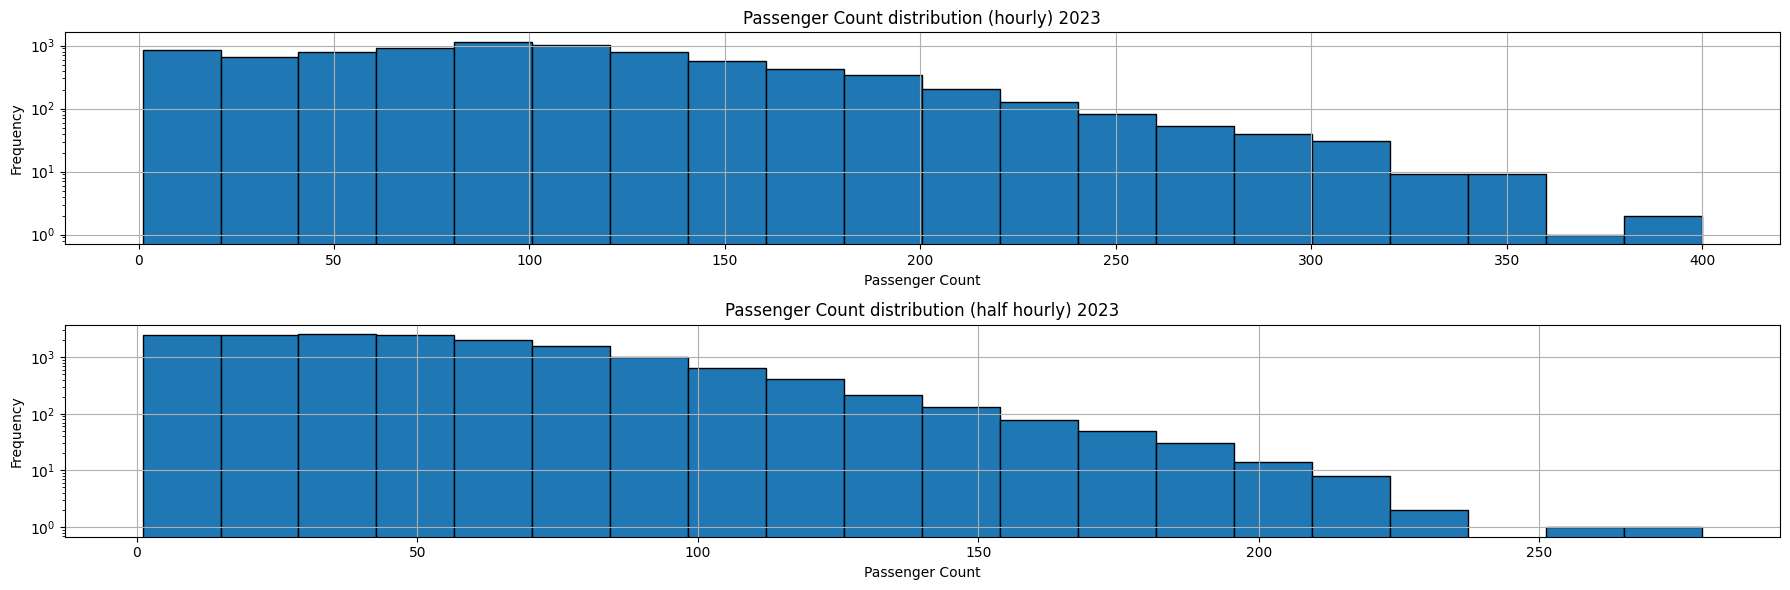

In [176]:
fig, axs = plt.subplots(2,1, figsize=(18,6))

axs[0].hist(hour2023['Passenger_Count'], bins=20, edgecolor='black')
axs[0].set_title('Passenger Count distribution (hourly) 2023')
axs[0].set_xlabel('Passenger Count')
axs[0].set_ylabel('Frequency')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[1].hist(halfhour2023['Passenger_Count'], bins=20, edgecolor='black')
axs[1].set_title('Passenger Count distribution (half hourly) 2023')
axs[1].set_xlabel('Passenger Count')
axs[1].set_ylabel('Frequency')
axs[1].set_yscale('log')
axs[1].grid(True)

plt.tight_layout()
plt.show()